# Iterable과 Iterator

- **Iterable**
    - 여러개의 데이터를 하나씩 또는 한 단위씩 제공하는 객체.
        - 다음 작업을 요청하면 값을 제공하며 for in 문에서 사용할 수 있다.
    - Iterator객체를 반환하는 `__iter__()` 특수 메소드를 정의해야 한다.
        - `__iter__()`는 `iter(Iterable)` 내장함수에 의해 호출된다. 
- **Iterator**
    - 자신을 생성한 Iterable의 값들을 하나씩 또는 한 단위씩 제공하는 객체
    - Iterable의 값을 제공하는 `__next__()` 특수 메소드를 정의한다.
        - `__next__()` 는 `next(Iterator)` 내정함수에 의해 호출된다.
        - 더 이상 제공할 값이 없을 경우 **StopIteration** Exception을 발생시켜야 한다.

In [ ]:
# 리스트, 튜플, 셋, 문자열, ... -> 이터럽블 타입.

In [3]:
my_list = [1, 10, 100] # iterable -> iterator를 제공.
# my_list_iterator = my_list.__iter__()
my_list_iterator = iter(my_list) # 내장함수 iter()를 사용하여 iterator를 얻을 수 있다. (간접적으로 호출)
print(type(my_list_iterator)) # <class 'list_iterator'>

<class 'list_iterator'>


In [4]:
v1 = next(my_list_iterator) # next() 내장함수를 사용하여 iterator에서 값을 하나씩 꺼낼 수 있다.
print(v1) # 1

1


In [5]:
v1 = next(my_list_iterator)
print(v1) # 10

10


In [6]:
v1 = next(my_list_iterator)
print(v1) # 100

100


In [7]:
v1 = next(my_list_iterator) # 더 이상 꺼낼 값이 없으면 StopIteration 예외가 발생한다.
print(v1) # StopIteration 예외 발생

StopIteration: 

In [9]:
# iterrator 생성
my_list_iterator = iter(my_list)
# 반복 처리
while True:
    try:
        v1 = next(my_list_iterator)
        print(v1)
    except StopIteration:
        print('StopIteration 예외 발생')
        break

1
10
100
StopIteration 예외 발생


In [12]:
class MyIterator:
    
    def __init__(self, values):
        self.values = values
        self.index = 0
        
    def __next__(self):
        # 자기를 생성한 iterable 객체에서 값을 하나씩 꺼내서 반환한다.
        # 더 이상 꺼낼 값이 없으면 StopIteration 예외를 발생시킨다.
        try:
            ret_value = self.values[self.index]
            self.index += 1
            return ret_value
        except:
            raise StopIteration(f'{self.index}은(는) 인덱스 범위를 벗어났습니다.')

In [13]:
class MyIterable:
    
    def __init__(self, *args):
        # *args : 제공해줄 원소ㅗ들을 가변인자로 받는다.
        self.values = args
        
    def __iter__(self):
        # iterator를 생성하여 반환
        return MyIterator(self.values)
        

## for in 문 Iterable의 값을 순환반복하는 과정

1. 반복 조회할 iterable객체의 __iter__() 를 호출 하여 Iterator를 구한다.
1. 매 반복마다 Iterator의 __next__() 를 호출하여 다음 원소를 조회한다.
1. 모든 원소들이 다 제공해 StopIteration Exception이 발생하면 반복문을 멈추고 빠져나온다.

In [18]:
m = MyIterable(1,2,3,4,5)
iter_m = iter(m)
print(next(iter_m))
print(next(iter_m))
for v in m:
    print(v)

1
2
1
2
3
4
5


## Generator
- Iterable과 Iterator를 합친 기능을 함수 형태로 구현(정의)한 것을 generator라고 한다.
    - 제공할 값들을 미리 메모리에 올리지 않고 로직을 통해 값들을 호출자가 필요할 때 마다 제공할 때 유용하다.
- 제너레이터 함수에서 값을 반환
    - **yield 반환값**
        - 반환값을 가지고 호출한 곳으로 돌아간다. 현재 상태(돌아가기 직전 상태)를 기억하면서 돌아간다. 
            - 값을 반환하고 일시정지 상태라고 생각하면 된다.
        - 다음 실행시점에 yield 구문 다음 부터 실행된다.
    - **return \[valuye\]**
        - generator 함수 종료
        - StopIteration 발생시킨다.
- Generator 의 원소 조회
    - next(Generator객체)

In [20]:
print(*range(10))

0 1 2 3 4 5 6 7 8 9


In [21]:
def test_generator(n = 0):
    while True:
        n += 1
        yield n

In [66]:
tg = test_generator() # 제너레이터 객체를 생성
print(type(tg)) # <class 'generator'>

<class 'generator'>


In [78]:
print(next(tg))

12


In [83]:
# reang(시작, 끝, 증가값) 을 제너레이터로 구현

# reang(), reange(1,2,3,4) -> TypeError
# range(1, 2, 0) -> ValueError
# range(10) -> 0 ~ 9
# range(1, 10) -> 1 ~ 9
# range(1, 10, 2) -> 1 ~ 9, 2씩 증가
# range(10, 1, -2) -> 10 ~ 3, 2씩 감소

def my_range(*args):
    start = 0
    end = 0
    step = 1
    if len(args) == 1:
        end = args[0]
    elif len(args) == 2:
        start = args[0]
        end = args[1]
    elif len(args) == 3:
        start = args[0]
        end = args[1]
        step = args[2]
    else:
        raise TypeError(f'my_range()는 1~3개의 인수를 받습니다. 받은 인수의 개수: {len(args)}')
    
    if step < 0:
        while start > end:
            yield start
            start += step
    elif step > 0:
        while start < end:
            yield start
            start += step
    else:
        raise ValueError('step은 0이 될 수 없습니다.')
    

In [90]:
 # range() 함수를 generator로 구현
# range(시작 정수, 종료 정수, 간격) -> 시작정수 ~ 종료 정수까지 간격만큼 더한 값들을 하나씩 제공.

def my_range2(start, stop=None, step=1):
    if stop == None:
        stop = start
        start = 0
        
    if step < 0:
        while start > stop:
            yield start
            start += step
    elif step > 0:
        while start < stop:
            yield start
            start += step
    else:
        raise ValueError('step은 0이 될 수 없습니다.')

In [89]:
print(*my_range(10))
print(*my_range(1, 10))
print(*my_range(1, 10, 2))
print(*my_range(10, 1, -2))

try:
    print(*my_range(10, 1, 0))
except Exception as e:
    print(type(e), e)

try:
    print(*my_range())
except Exception as e:
    print(type(e), e)

try:
    print(*my_range(1,2,3,4))
except Exception as e:
    print(type(e), e)


0 1 2 3 4 5 6 7 8 9
1 2 3 4 5 6 7 8 9
1 3 5 7 9
10 8 6 4 2
<class 'ValueError'> step은 0이 될 수 없습니다.
<class 'TypeError'> my_range()는 1~3개의 인수를 받습니다. 받은 인수의 개수: 0
<class 'TypeError'> my_range()는 1~3개의 인수를 받습니다. 받은 인수의 개수: 4


### Generator 표현식 (Generator Comprehension)
- 컴프리헨션구문을 **( )** 로 묶어 표현한다.
- 컴프리헨션 구문안의 Iterable의 원소들을 처리해서 제공하는 generator 표현식
- Generator Comprehension 은 반복 가능한 객체만 만들고 실제 원소에 대한 요청이 왔을 때 값을 생성한다.
    - 메모리 효율이 다른 Comprehension들 보다 좋다.

In [95]:
[ v for v in range(10) ] # 리스트 컴프리헨션

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [94]:
gen = ( v for v in range(10) ) # 제너레이터 컴프리헨션

for v in gen: # 제너레이터 컴프리헨션은 제너레이터 객체를 생성
    print(v , end=' ')

0 1 2 3 4 5 6 7 8 9 

In [3]:
from mypackage.prime import prime_generator as p_gen
gen = (v for v in p_gen(2) if str(v) == str(v)[::-1]) # 펠린드롬 소수를 제너레이터 컴프리헨션으로 생성

In [11]:
for v in range(10):
    print(next(gen), end=' ')

70207 70507 70607 71317 71917 72227 72727 73037 73237 73637 

313 353 373 383 727 757 787 797 919 929 

# Decorator (장식자)

## 파이썬에서 함수는 일급 시민(first class citizen) 이다.
- 일급 시민 (first class citizen) 이란
    1. 변수에 대입 할 수 있다.
    2. Argument로 사용할 수 있다.
    3. 함수나 메소드의 반환값으로 사용 할 수 있다.
    

## 지역함수(Local Function) 란
- 함수 안에 정의 한 함수를 말한다.
    - 중첩 함수(Nested function) 이라고도 한다.
- 지역함수가 선언된 함수를 **outer function** 지역함수는 **inner function** 이라고 한다. 
- inner function은 outer function의 지역변수를 자유롭게 사용할 수 있다.
- 기본적으로 inner function은 outer function 안에서만 호출 할 수있다.
- 단 outer function이 정의된 inner function을 return value로 반환하면 밖에서도 호출 할 수 있다.

In [106]:
def outer():
    a = 10
    def inner():
        print(a)
    inner()
    inner()
    print('aaaa')
    inner()
    return inner

In [108]:
f = outer()
f()

10
10
aaaa
10
10


## Closure (클로저)
- 지역함수(Inner function)를 정의한 Outer function이 종료되어도 지역함수가 종료될 때까지 outer function의 지역변수들은 메모리에 계속 유지 되어 inner function에서 사용할 수 있다. 
- 파이썬 실행환경은 inner function이 종료될때 까지 outer function의 지역변수들(parameter포함)을 사용할 수 있도록 저장하는 공간이 **closure**이다.

In [2]:
def outer():
    a = 10
    def inner():
        print(a)
    return inner

f = outer()         # outer() 함수 종료
f()                 # inner() 함수가 사용할 수 있는 변수 a는 여전히 존재한다.
                    # f() 함수가 inner() 함수를 호출할 때 
                    # inner() 함수가 사용할 수 있는 변수를 저장하고 있는 공간이 closure이다.

10


## Decorator (장식자)
- 기존의 함수를 수정하지 않고 그 함수 전/후에 실행되는 구문을 추가할 수 있도록 하는 함수를 말한다.
- 기존 함수코드를 수정하지 않고 새로운 기능의 추가를 쉽게 해준다.
- 추가기능을 다수의 함수에 적용할 수 있다.
- 함수의 전/후처리 하는 구문을 **필요하면 붙이고 필요 없으면 쉽게 제거할 수 있다**

![개요](images/ch10_01.png)

In [1]:
def dec_sort_reverse(func): # 함수를 입력으로 받아 전처리 후처리를 하는 데코레이터 함수
    def wrapper(l):
        l.sort()        # 전처리
        l = func(l)     # 함수 호출
        l.reverse()     # 후처리
        return l        # 반환
    return wrapper  # 데코레이터 함수를 반환

def list_twice(l):
    return l * 2

In [2]:
import random as r
l = [ r.randint(0, 10) for _ in range(10) ]
print(list_twice(l))
deco_list_twice = dec_sort_reverse(list_twice) # 데코레이터 함수를 호출하여 데코레이터 함수를 반환받는다.
print(deco_list_twice(l))   # 데코레이터 함수를 사용해 원본함수에 전처리 후처리를 한다.

[9, 1, 8, 5, 3, 4, 4, 0, 5, 6, 9, 1, 8, 5, 3, 4, 4, 0, 5, 6]
[9, 8, 6, 5, 5, 4, 4, 3, 1, 0, 9, 8, 6, 5, 5, 4, 4, 3, 1, 0]


In [97]:
def deco_contour_bar_print(func):
    def wrapper(*args, **kwargs):
        print('-' * 30)
        func(*args, **kwargs)
        print('-' * 30)
    return wrapper

def deco_contour_shape_print(func):
    def wrapper(*args, **kwargs):
        print('#' * 30)
        func(*args, **kwargs)
        print('#' * 30)
    return wrapper

def deco_center_print(func):
    def wrapper(*args, **kwargs):
        s = ''
        sep = kwargs['sep']
        end_ = kwargs['end']
        for v in args:
            s += str(v)
            s += sep
        s = s[:-len(sep)]
        s += end_
        if end_ != '\n':
            s += '\n'
        print(' ' * (15 - len(s) // 2), end='')
        func(s, end = '')
    return wrapper

c_print = deco_center_print(print)
bar_print = deco_contour_bar_print(print)
bar_c_print = deco_contour_bar_print(c_print)
shape_print = deco_contour_shape_print(print)
shape_c_print = deco_contour_shape_print(c_print)
shape_bar_c_print = deco_contour_shape_print(bar_c_print)


In [98]:
@deco_contour_shape_print       
@deco_contour_bar_print
@deco_center_print
def my_print(*args, **kwargs):  # 데코레이터를 사용한 함수 정의
    print(*args, **kwargs)

In [100]:
print('hello', 'world', 'python', sep='-', end='')
print()
my_print('hello', 'world', 'python', sep='-', end='') # my_print() 함수를 호출하면 데코레이터가 적용된다.
print()
shape_bar_c_print('hello', 'world', 'python', sep='-', end='')

hello-world-python
##############################
------------------------------
      hello-world-python
------------------------------
##############################

##############################
------------------------------
      hello-world-python
------------------------------
##############################


### Decorator 구현 및 사용

- 구현
    1. 전/후처리 기능을 추가할 함수를 parameter로 받는다.
    2. 그 함수 호출 전후로 추가할 기능을 작성한 **지역함수**를 정의한다.
    3. `2`번의 함수를 반환한다.
```python
def decorator(func):
    def wrapper([parameter]): # decorator 적용할 함수에 파라미터를 전달할 경우 parameter 변수들을 선언
        # 전처리
        func()
        # 후처리
    return wrapper 
```

- 호출
    - `@decorator이름`를 적용하고자하는 함수 선언전에 기술한다.
```python
@decorator
def caller([parameter]):
    ...
```

# TODO
함수가 실행된 실행시간(초)을 재는 decorator

In [2]:
import time as t    # time 모듈을 가져온다.
t.time() # 1970년 1월 1일 0시 0분 0초를 기준으로 현재까지 경과된 시간을 초 단위로 반환

1681362835.2109404

In [3]:
from mypackage import prime as p

def deco_runtime(func):   # 함수의 실행 시간을 측정하는 데코레이터 함수
    def wrapper(*args, **kwargs):
        start = t.time()                # 시작 시간을 기록
        result = func(*args, **kwargs)  # 함수를 호출
        end = t.time()                  # 종료 시간을 기록
                                        # 함수의 실행 시간을 계산
        print(f'함수 {func.__name__}의 실행 시간: {sec_to_mmssms(end - start)}')
        return result                   # 함수의 반환값을 반환
    return wrapper              # 데코레이터 함수를 반환

# 초 단위의 시간을 분:초:밀리초 형식의 문자열로 변환하는 함수
def sec_to_mmssms(sec : float) -> str:
    ms = int((sec - int(sec)) * 1000)
    sec = int(sec)
    m = sec // 60
    s = sec % 60
    return f'{m:02d}:{s:02d}:{ms:03d}'
    

In [4]:
@deco_runtime   # 실행시간 측정 데코레이터
def one_sleep_two(*args, **kwargs): 
    print('one')
    t.sleep(args[0])    # 첫 번째 인수로 전달된 시간만큼 대기
    print('two')

In [165]:
# 데코레이터가 적용되어 실행시간이 측정된다.
one_sleep_two(5)

one
two
함수 one_sleep_two의 실행 시간: 00:05:009


In [8]:
@deco_runtime   # 실행시간 측정 데코레이터
def is_prime_n_to_m(n = 0, m = None):   # n부터 m까지의 소수를 출력하는 함수
    if m == None:
        m = n
        n = 0
    for v in range(n, m + 1):
        if p.is_prime(v):
            print(v, end=' ')
    print()

In [11]:
p.is_prime(1003001)
is_prime_rt = deco_runtime(p.is_prime)  # is_prime() 함수를 데코레이터로 감싼다.
print(is_prime_rt(1003001))             # 데코레이터가 적용된 함수를 호출한다.

함수 is_prime의 실행 시간: 00:00:000
True


In [10]:
is_prime_n_to_m(10)    # 데코레이터가 적용된 함수를 호출한다.   

2 3 5 7 
함수 is_prime_n_to_m의 실행 시간: 00:00:000


In [13]:
f = lambda x : 2 * x ** 2 + 3 * x + 1 + 2
f_rt = deco_runtime(f)  # 람다 함수를 데코레이터로 감싼다.
for n in range(20):
    print(f_rt(n))

함수 <lambda>의 실행 시간: 00:00:000
3
함수 <lambda>의 실행 시간: 00:00:000
8
함수 <lambda>의 실행 시간: 00:00:000
17
함수 <lambda>의 실행 시간: 00:00:000
30
함수 <lambda>의 실행 시간: 00:00:000
47
함수 <lambda>의 실행 시간: 00:00:000
68
함수 <lambda>의 실행 시간: 00:00:000
93
함수 <lambda>의 실행 시간: 00:00:000
122
함수 <lambda>의 실행 시간: 00:00:000
155
함수 <lambda>의 실행 시간: 00:00:000
192
함수 <lambda>의 실행 시간: 00:00:000
233
함수 <lambda>의 실행 시간: 00:00:000
278
함수 <lambda>의 실행 시간: 00:00:000
327
함수 <lambda>의 실행 시간: 00:00:000
380
함수 <lambda>의 실행 시간: 00:00:000
437
함수 <lambda>의 실행 시간: 00:00:000
498
함수 <lambda>의 실행 시간: 00:00:000
563
함수 <lambda>의 실행 시간: 00:00:000
632
함수 <lambda>의 실행 시간: 00:00:000
705
함수 <lambda>의 실행 시간: 00:00:000
782


In [20]:
input_list = [7, 7, 8, 10]

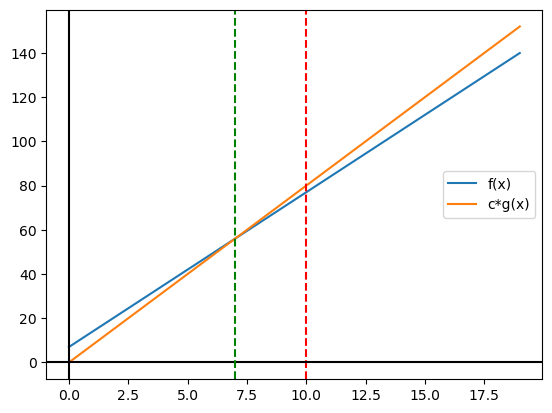

In [40]:
import matplotlib.pyplot as plt  # matplotlib 라이브러리를 plt로 import

a1, a0, c, n0 = input_list  # input_list에서 a1, a0, c를 받아옴

# f(x) = a1 * x + a0 함수를 lambda로 정의


def f(x):
    return a1 * x + a0

# g(x) = x 함수를 lambda로 정의


def g(x):
    return x*c


# x축 범위를 n0-5에서 n0+5까지로 설정
x = range(n0-10, n0+10)

# f(x)에 대한 그래프를 그림
plt.plot(x, [f(i) for i in x], label='f(x)')

# g(x)에 대한 그래프를 그림
plt.plot(x, [g(i) for i in x], label='c*g(x)')

# 범례를 추가
plt.legend()

# x = n0인 수직선을 추가
plt.axvline(x=n0, color='r', linestyle='--')

# x축 범위에서 y=0인 수평선을 추가
plt.axhline(y=0, color='k')

# y축 범위에서 x=0인 수직선을 추가
plt.axvline(x=0, color='k')

# f(x)와 g(x)의 교점을 지나는 수직선을 추가
# f(x)와 g(x)의 교점은 f(x) - g(x) = 0을 만족하는 x값이다.
# 이를 이용하여 교점을 구하고, 해당 교점을 지나는 수직선을 추가한다.
intersection_x = (a0/c) / (1 - (a1/c))
plt.axvline(x=intersection_x, color='g', linestyle='--')

# 그래프를 출력
plt.show()
